# **Superstore Data Analysis**  
I am **Ademola Abraham**, a **data analyst** specializing in deriving actionable insights from business datasets. With expertise in data cleaning, exploratory data analysis (EDA), and querying techniques, I provide clients with clear and impactful solutions to their data-driven questions. This analysis highlights the results from the Superstore dataset, showcasing my ability to transform raw data into meaningful business insights utilizing **Python**.  


## **Objectives of the Analysis**  
The primary objectives of this analysis were:  
1. To clean and preprocess the dataset for accuracy and consistency.  
2. To perform Exploratory Data Analysis (EDA) and uncover key sales, profit, and shipping trends.  
3. To answer 12 targeted questions from the client to inform decision-making and improve business strategies.  
4. To identify top-performing and underperforming states, categories, and subcategories for sales and revenue generation.  
5. To visualize customer purchasing patterns and shipping preferences.  


## **Data Source and Description**  
The dataset used for this analysis is the popular Superstore dataset, which is commonly used in retail analytics, it was gotten from [Kaggle Dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final). It contains transactional data, including:  
- **Sales:** Details of products sold and revenue generated.  
- **Profit:** Profit margins for individual sales.  
- **Customer Information:** Geographic and demographic details.  
- **Order Details:** Order dates, quantities, and shipping modes.  
- **Categories/Subcategories:** Product classifications for granular analysis.  

This dataset provides a comprehensive view of the business operations of a retail store, enabling detailed analysis and visualization for better business decision-making.  


### Importing Python Libaries needed for Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Data Preparation and Cleaning

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_excel(r'Sample - Superstore-excel.xlsm')
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [6]:
datatype_changes = {'Order ID':'string', 'Ship Mode':'category',
       'Customer ID':'string', 'Customer Name':'string', 'Segment':'category', 'Country':'string', 'City':'string', 
       'State':'string', 'Postal Code':'int', 'Region':'category', 'Product ID':'string', 'Category':'category', 
       'Sub-Category':'category', 'Product Name':'string', 'Sales':'float', 'Quantity':'int', 'Discount':'float', 
       'Profit':'float'}

data = data.astype(datatype_changes)
data.dtypes

Row ID                    int64
Order ID                 string
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID              string
Customer Name            string
Segment                category
Country                  string
City                     string
State                    string
Postal Code               int32
Region                 category
Product ID               string
Category               category
Sub-Category           category
Product Name             string
Sales                   float64
Quantity                  int32
Discount                float64
Profit                  float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   string        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   category      
 5   Customer ID    9994 non-null   string        
 6   Customer Name  9994 non-null   string        
 7   Segment        9994 non-null   category      
 8   Country        9994 non-null   string        
 9   City           9994 non-null   string        
 10  State          9994 non-null   string        
 11  Postal Code    9994 non-null   int32         
 12  Region         9994 non-null   category      
 13  Product ID     9994 non-null   string        
 14  Category       9994 non-null   category      
 15  Sub-Category   9994 n

In [8]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Exploratory Analysis and Visualization

In [9]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14,5)
sns.set_style('darkgrid')

In [10]:
data['Order Period'] = data['Order Date'].dt.to_period('M').astype(str)
data['Order Month'] = data['Order Date'].dt.month_name()

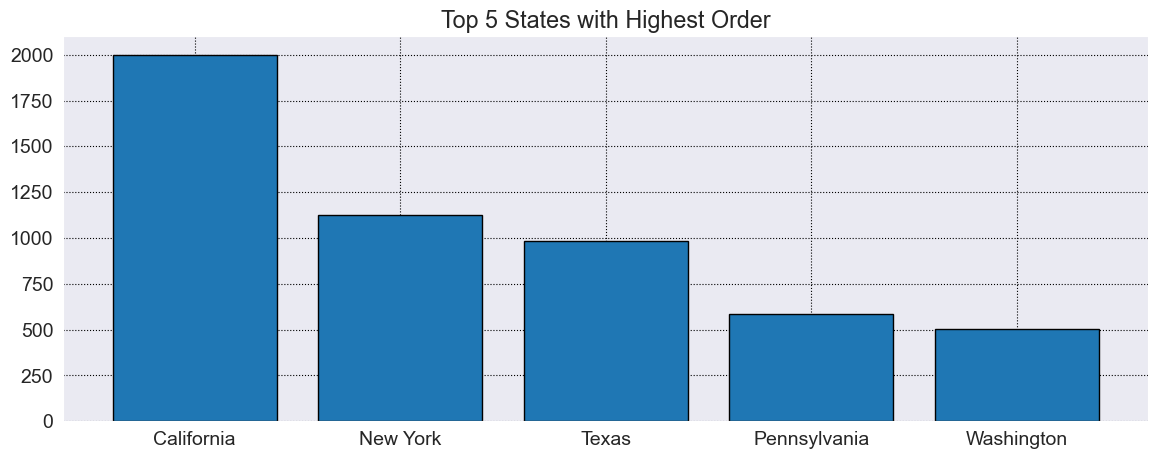

In [11]:
a = data['State'].value_counts()[:5]
a1 = a.index
a2 = a
plt.bar(a1,a2, edgecolor='black')
plt.title('Top 5 States with Highest Order');
plt.grid(color='black', linestyle=':')

California leads in sales with approximately 2,000 orders, significantly outpacing New York and Texas. Pennsylvania and Washington complete the top five with 800 and 500 sales, respectively. This highlights California as the most critical market, while New York and Texas also serve as strong contributors. Targeting these states with focused campaigns can boost revenue further, while Washington presents potential for growth with strategic interventions.

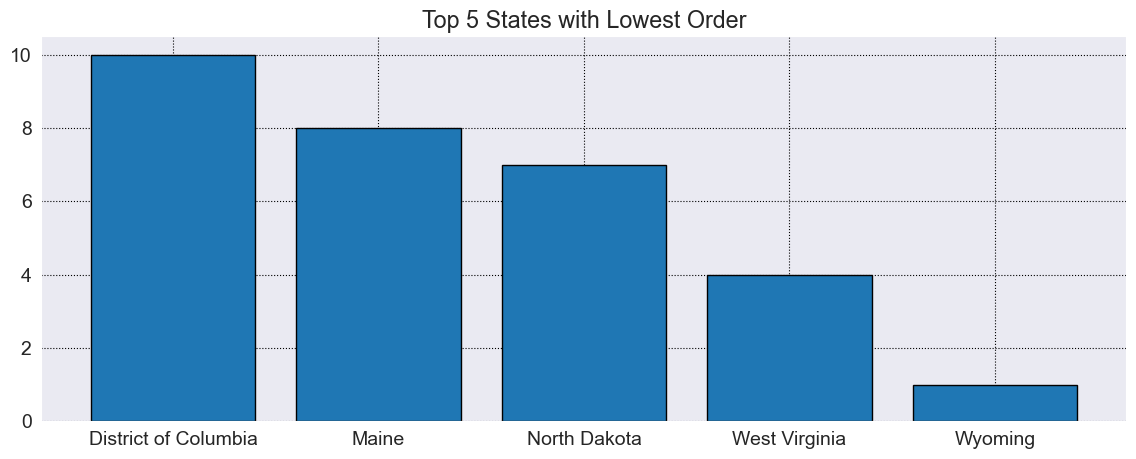

In [12]:
b = data['State'].value_counts()[-5:]
b1 = b.index
b2 = b
plt.bar(b1,b2, edgecolor='black')
plt.title('Top 5 States with Lowest Order');
plt.grid(color='black', linestyle=':')

Wyoming recorded the least sales with only 1 order, followed by West Virginia (4), North Dakota (7), Maine (8), and the District of Columbia (10). These figures highlight regions with low market penetration, possibly due to smaller populations, lack of visibility, or limited reach. To address this, tailored strategies like localized promotions, partnerships, or targeted advertising may help improve performance in these areas.

In [13]:
c = data.groupby('Order Period')['Order Month'].value_counts()
c1 = list()
for p in c.index:
    c1.append(p[0])

c2 = np.array(c1)

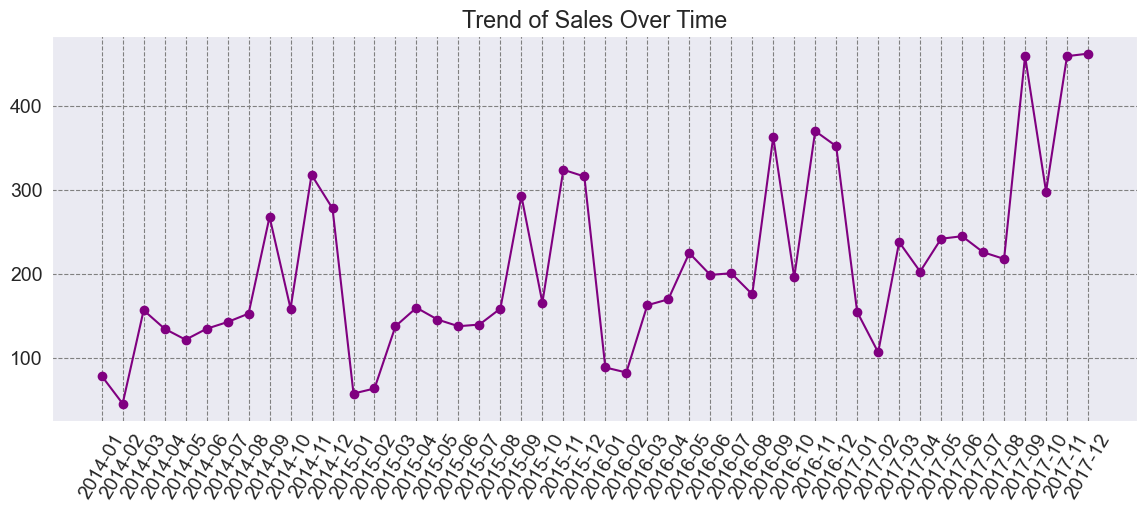

In [14]:
plt.plot(c2,c.values,c='purple', marker='o')
plt.xticks(rotation = 60)
plt.title('Trend of Sales Over Time')
plt.grid(color='grey', linestyle='--');

The line chart illustrates the fluctuation in the number of sales over time. Sales show a consistent pattern of peaks and troughs, suggesting periodic demand cycles. Toward the later part of the timeline, there's a noticeable upward trend, indicating growth in sales activity over time. This visualization emphasizes the seasonality and long-term growth of sales in the dataset

In [15]:
data['Delivery Time'] = -(data['Order Date'] - data['Ship Date'])

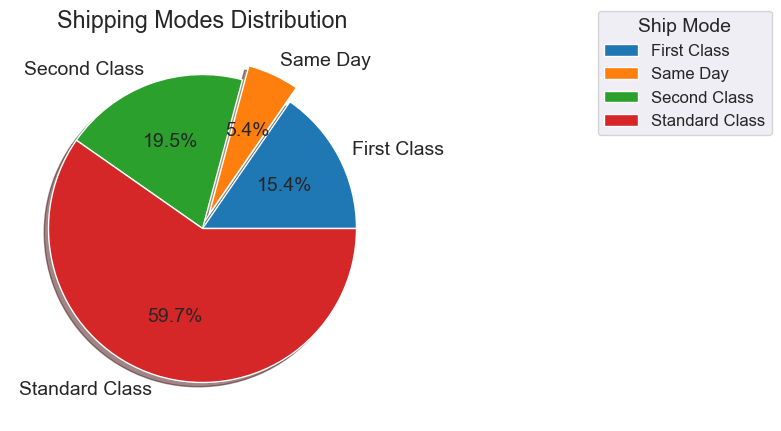

In [16]:
label = np.array(data['Ship Mode'].value_counts(sort=False).index)
d = np.array(data['Ship Mode'].value_counts(sort=False))

plt.pie(d, labels=label, shadow=True, autopct ='%.1f%%', explode=[0,0.1,0,0])
plt.legend(title='Ship Mode', loc = 4,fontsize  = 12, bbox_to_anchor =(2, 0.72), ncol = 1)
plt.title('Shipping Modes Distribution');

Standard Class dominates the shipping preferences, accounting for 59.7% of all orders. Second Class (19.5%) and First Class (15.4%) follow, while Same Day shipping is least used at just 5.4%. This suggests that most customers prioritize affordability over speed. Encouraging faster shipping methods through discounts or value-added services could balance cost-effectiveness with faster delivery.

In [17]:
print("Average Delivery Time by Ship Mode")
e = data.groupby('Ship Mode')['Delivery Time'].mean().reset_index()
e

Average Delivery Time by Ship Mode


,Ship Mode,Delivery Time
0,First Class,2 days 04:23:05.695708712
1,Same Day,0 days 01:03:38.784530386
2,Second Class,3 days 05:42:47.197943444
3,Standard Class,5 days 00:09:24.611260053


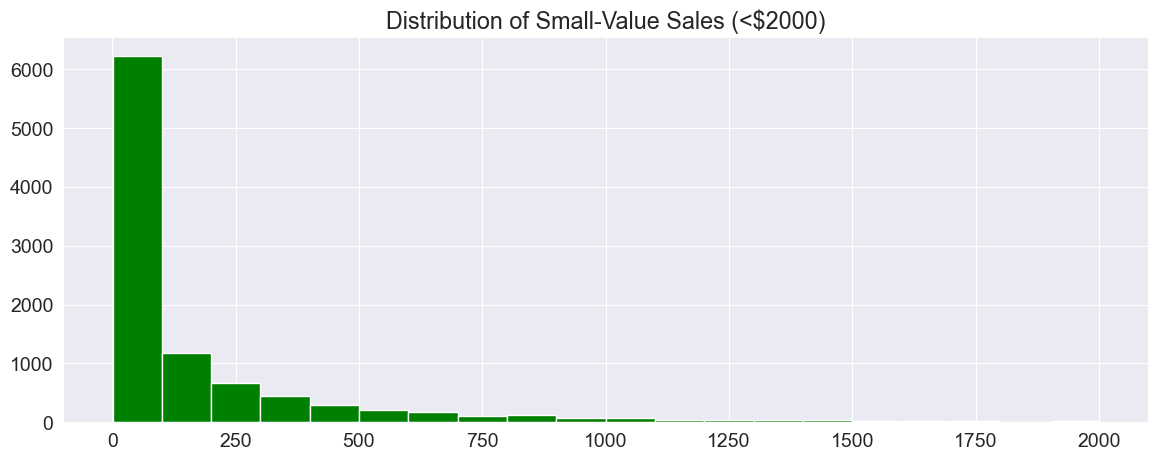

In [18]:
plt.hist(x=data[data['Sales']<2000]['Sales'], bins=20, color='green')
plt.title('Distribution of Small-Value Sales (<$2000)');

The histogram focuses on the distribution of sales amounts under 2000dollars. The majority of sales are concentrated below 250dollars, with a steep drop-off as sales amounts increase. This indicates that most transactions are of smaller value, which could reflect the type of products sold or customer purchasing behavior.

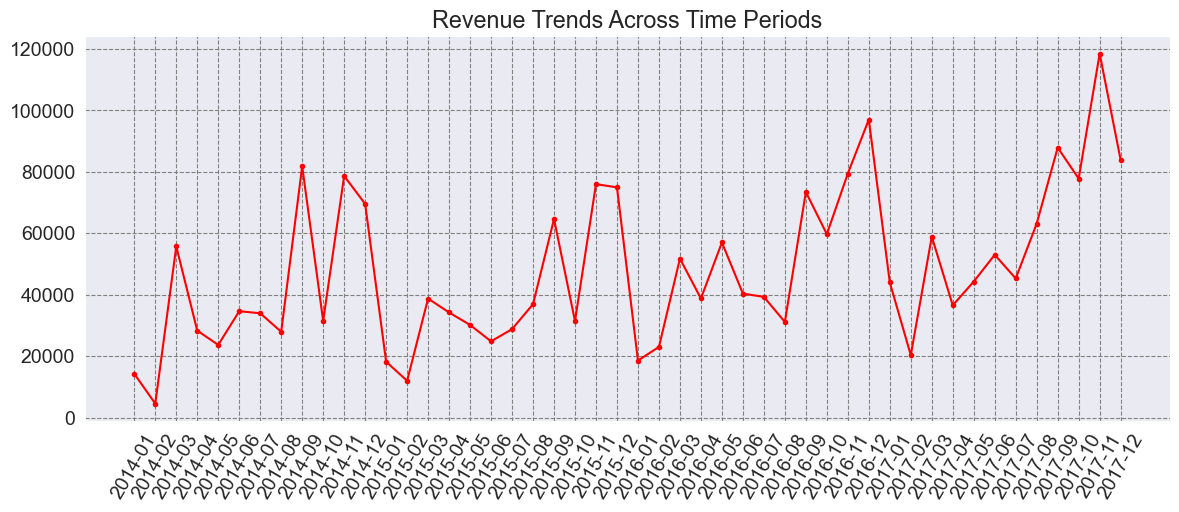

In [19]:
f = data.groupby('Order Period')['Sales'].sum()

plt.plot(f.index,f.values,c='red', marker='.')
plt.xticks(rotation = 60)
plt.title('Revenue Trends Across Time Periods')
plt.grid(color='grey', linestyle='--');

The line chart highlights the revenue trends over time, with several spikes and dips. Revenue generation displays a cyclical pattern, much like sales, with significant peaks at specific intervals. There is also a clear upward trajectory in revenue toward the later part of the timeline, mirroring the growth seen in sales.

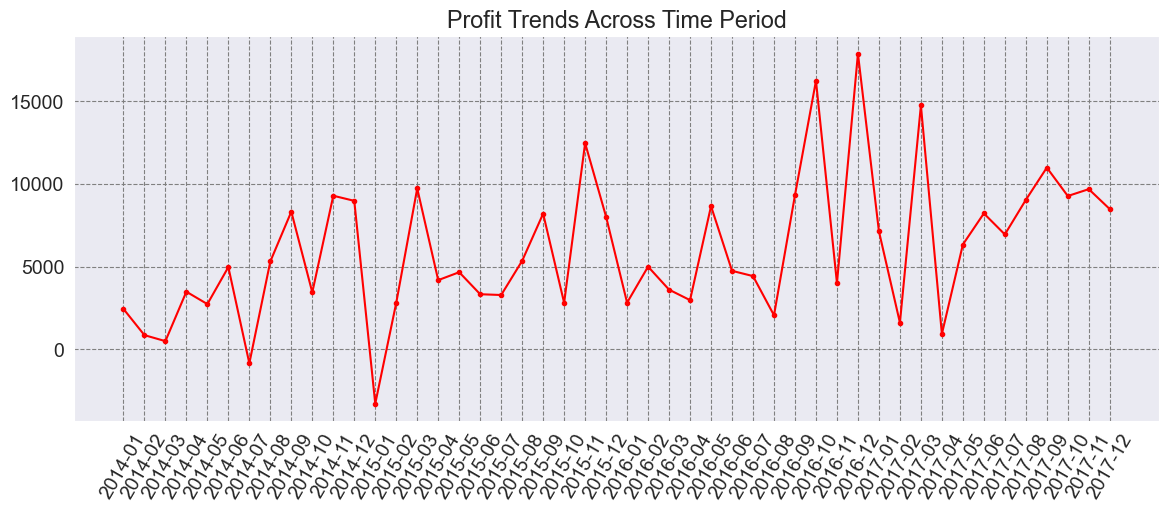

In [20]:
g = data.groupby('Order Period')['Profit'].sum()

plt.plot(g.index,g.values,c='r', marker='.')
plt.xticks(rotation = 60)
plt.title('Profit Trends Across Time Period')
plt.grid(color='grey', linestyle='--');

The line chart illustrates periodic fluctuations in profit over the analyzed time period. Peaks suggest periods of high sales activity, possibly corresponding to promotional campaigns or holiday seasons. Consistent dips may signal recurring challenges during specific times of the year, which should be analyzed for corrective action.

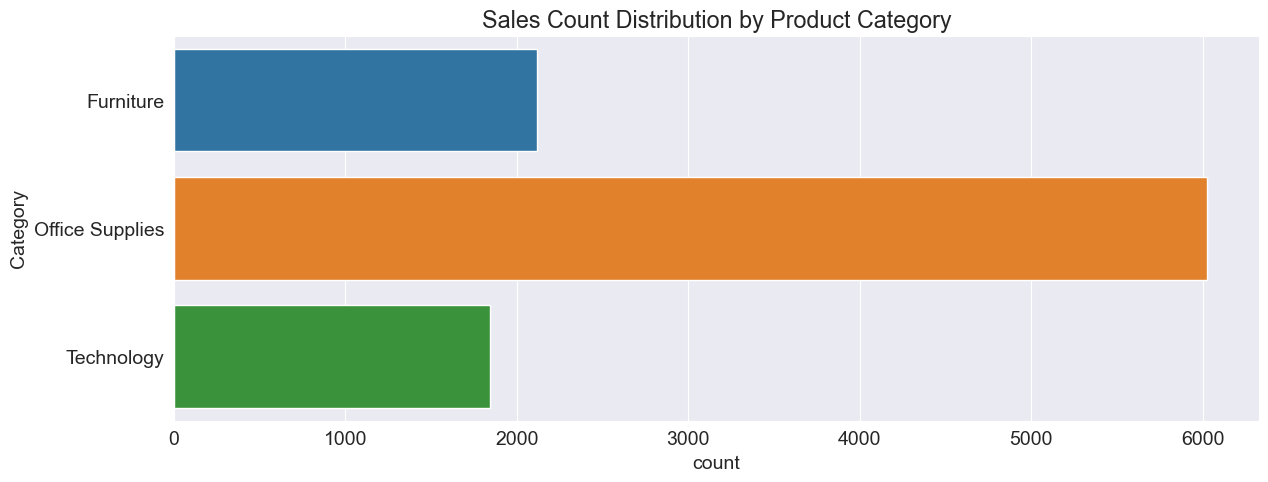

In [21]:
sns.countplot(data=data, y='Category')
plt.title('Sales Count Distribution by Product Category');

Office Supplies overwhelmingly lead in sales volume with about 6,000 orders, indicating steady demand. Furniture (abput 2,200) and Technology (about 1,800) lag behind significantly. The strong performance of Office Supplies suggests its reliability as a core product category, while Furniture and Technology have room for growth through targeted promotions, product bundles, or discounts.

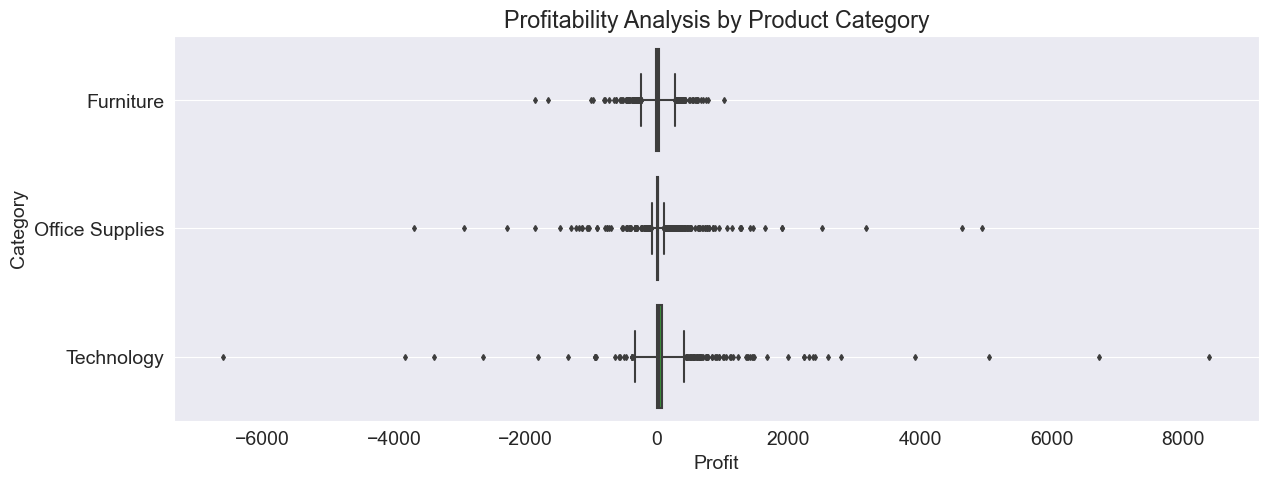

In [22]:
sns.boxplot(data=data, y='Category', x='Profit', fliersize=3, whis=5)
plt.title('Profitability Analysis by Product Category')
plt.grid();

Technology stands out as the most profitable category, with positive profit margins extending across a wider range.

Office Supplies shows steady but less pronounced profits, indicating consistent but smaller returns.

Furniture, on the other hand, has a large spread of negative profits, suggesting inefficiencies or challenges in cost management for this category.

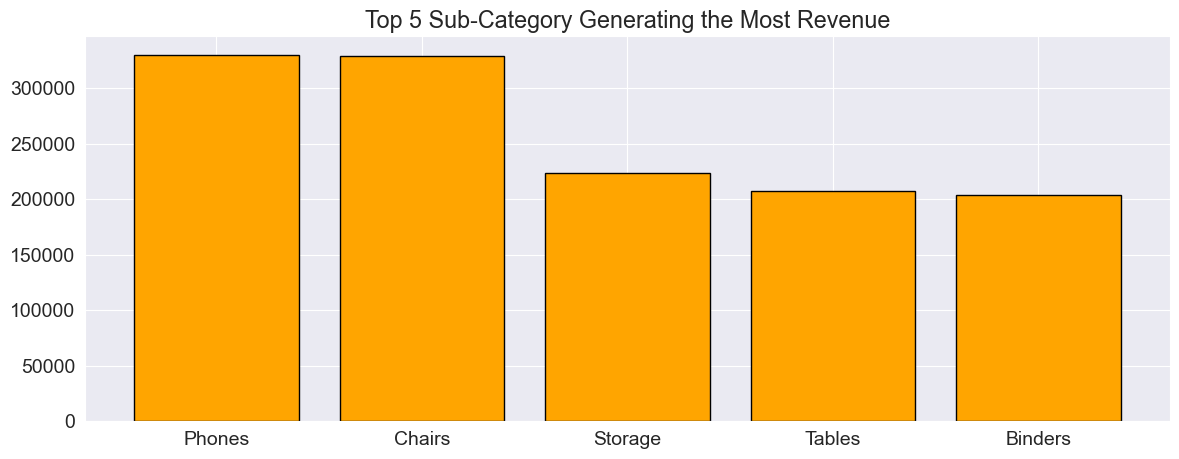

In [23]:
h = data.groupby('Sub-Category')['Sales'].sum().round(0).reset_index().sort_values('Sales', ascending=False)

plt.bar(x=h['Sub-Category'][:5], height=h['Sales'][:5], color='orange', edgecolor='black')
plt.title('Top 5 Sub-Category Generating the Most Revenue');

Phones and Chairs are the most lucrative sub-categories, each generating over 300,000dollars in revenue. Storage, Tables, and Binders follow, each contributing over $200,000. These results identify Phones and Chairs as key drivers of profitability. Prioritizing these sub-categories in inventory, marketing, and sales strategies can maximize revenue potential.

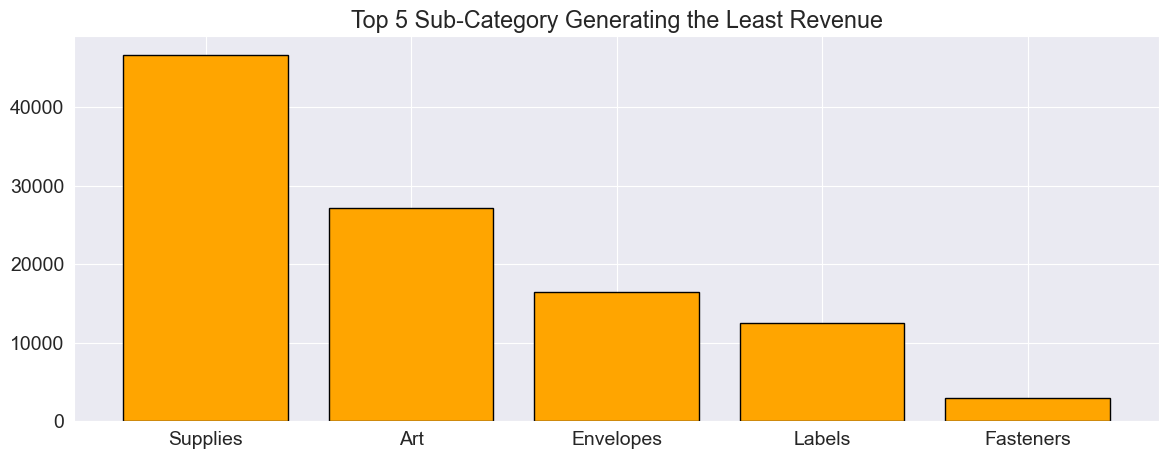

In [24]:
plt.bar(x=h['Sub-Category'][-5:], height=h['Sales'][-5:], color='orange', edgecolor='black')
plt.title('Top 5 Sub-Category Generating the Least Revenue');

Fasteners earned the least revenue, contributing only about 2,000dollars, followed by Labels (about 12,000dollars), Envelopes (about 15,000dollars), Art (about 25,000dollars), and Supplies (about 40,000dollars). These sub-categories are either low-demand or low-margin, suggesting a need to reassess their inventory allocation. Offering targeted promotions or re-evaluating their necessity in the product lineup could optimize resources.

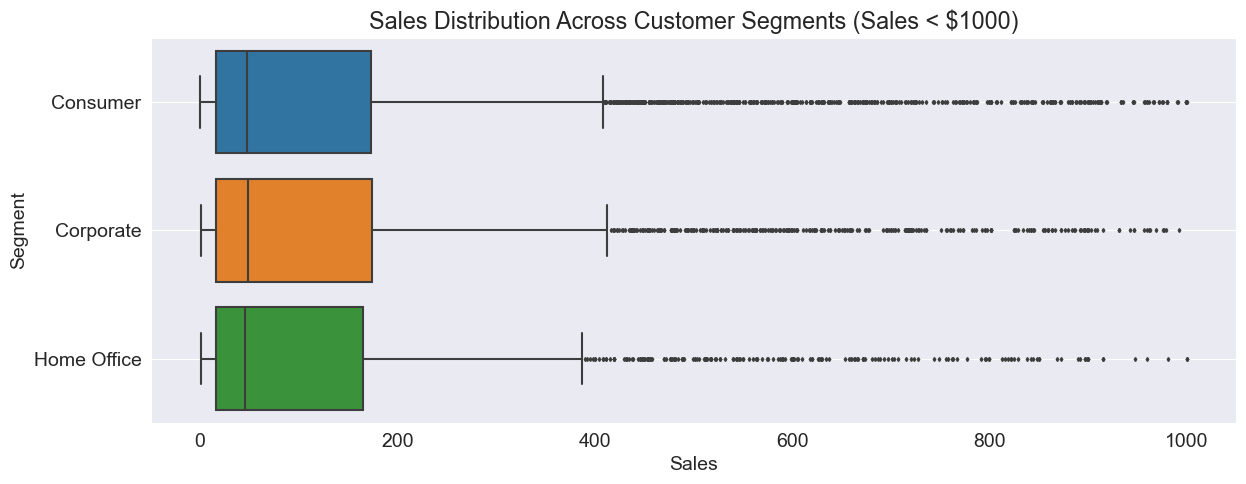

In [25]:
sns.boxplot(data=data[data['Sales']<1000], y='Segment', x='Sales', fliersize=2)
plt.title('Sales Distribution Across Customer Segments (Sales < $1000)')
plt.grid();

From the box plot, it is evident that the Consumer segment has the widest range of sales distribution under $1000, indicating that this segment generates a significant portion of the revenue at lower sales thresholds.

The Corporate segment has a similar range but with fewer outliers, suggesting more consistent sales patterns.

The Home Office segment exhibits the lowest range and fewer outliers, implying it generates less revenue compared to the other segments.

# Questions and Answers

## 1. What are the total sales, profit and quantity sold across the dataset?

In [26]:
i = data[['Sales','Profit','Quantity']].sum().round(0)
i

Sales       2297201.0
Profit       286397.0
Quantity      37873.0
dtype: float64

In [27]:
print('''
1. What are the total sales, profit and quantity sold across the dataset?
Answer

Total Sales: ${}
Total Profit: ${}
Total Quantity: {}'''.format(i[0],i[1],i[2]))


1. What are the total sales, profit and quantity sold across the dataset?
Answer

Total Sales: $2297201.0
Total Profit: $286397.0
Total Quantity: 37873.0


## 2. Which Product generate the highest profit and which ones result in losses?


In [28]:
j = data.groupby('Product Name')[['Profit']].sum().sort_values('Profit')
j

,Profit
Product Name,
Cubify CubeX 3D Printer Double Head Print,-8879.9704
Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
Cubify CubeX 3D Printer Triple Head Print,-3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2876.1156
Bush Advantage Collection Racetrack Conference...,-1934.3976
...,...
HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
Canon PC1060 Personal Laser Copier,4570.9347
Hewlett Packard LaserJet 3310 Copier,6983.8836


In [29]:
print('''
2. Which Product generate the highest profit and which ones result in losses?¶
Answer: "{}" generated the highest Profit, ${} while "{}" resulted in losses, ${}'''.format(j.index[-1],int(j.values[-1]),j.index[0],int(j.values[0])))


2. Which Product generate the highest profit and which ones result in losses?¶
Answer: "Canon imageCLASS 2200 Advanced Copier" generated the highest Profit, $25199 while "Cubify CubeX 3D Printer Double Head Print" resulted in losses, $-8879


## 3. What is the average discount given and how does it affect profit margins?


In [30]:
k = data['Discount'].mean()
k

0.15620272163297977

In [31]:
print('''
3. What is the average discount given and how does it affect profit margins?
Answer: Average Discount is ${}

it has no effect on profit margin cause it's too small'''.format(k.round(1)))


3. What is the average discount given and how does it affect profit margins?
Answer: Average Discount is $0.2

it has no effect on profit margin cause it's too small


## 4. Who are the top 10 customers by total sales?


In [32]:
print('''
top 10 customers by total sales in descending order''')
l = data.groupby('Customer Name')[['Sales']].sum().sort_values('Sales')
l[-10:]


top 10 customers by total sales in descending order


,Sales
Customer Name,
Christopher Conant,12129.072
Sanjit Engle,12209.438
Hunter Lopez,12873.298
Sanjit Chand,14142.334
Ken Lonsdale,14175.229
Adrian Barton,14473.571
Tom Ashbrook,14595.620
Raymond Buch,15117.339
Tamara Chand,19052.218


## 5. Which customer segments contribute the most to sales and profit?


In [33]:
m = data.groupby('Segment')[['Sales', 'Profit']].sum()
m1 = m.sort_values('Sales')
m2 = m.sort_values('Profit')
m

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


In [34]:
print('''
5. Which customer segments contribute the most to sales and profit?
Answer:
The segments that contribute most to sales is {}, while for profit is {}'''.format(m1.index[-1], m2.index[-1]))


5. Which customer segments contribute the most to sales and profit?
Answer:
The segments that contribute most to sales is Consumer, while for profit is Consumer


## 6. What is the Distribution of sales and profit across different regions?


In [35]:
print('Distribution of sales and profit across different regions')
n = data.groupby('Region')[['Sales','Profit']].sum().sort_values('Sales')
n.round(1)

Distribution of sales and profit across different regions


,Sales,Profit
Region,,
South,391721.9,46749.4
Central,501239.9,39706.4
East,678781.2,91522.8
West,725457.8,108418.4


## 7. What is the average time taken to deliver orders?


In [36]:
print('The average time taken to deliver orders by ship mode')
e

The average time taken to deliver orders by ship mode


,Ship Mode,Delivery Time
0,First Class,2 days 04:23:05.695708712
1,Same Day,0 days 01:03:38.784530386
2,Second Class,3 days 05:42:47.197943444
3,Standard Class,5 days 00:09:24.611260053


## 8. What is the relationship between shipping mode and profit?


In [37]:
o = data.groupby('Ship Mode')[['Profit']].sum().sort_values('Profit', ascending=False)
o.round(1)

,Profit
Ship Mode,
Standard Class,164088.8
Second Class,57446.6
First Class,48969.8
Same Day,15891.8


Standard class being the most used due to it being the most affordable, naturally more profit is made here unlike the least which is first class that's more expensive and faster, indicating most people ordering ain't in a rush for their product to be delivered and priotize affordability over speed hence **Standard class is most preferred by customers and it saves budget**

## 9. Which shipping mode is used and how does it affect delivery time and customer satisfaction?

In [38]:
p = data['Ship Mode'].value_counts(sort=True)
p

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [39]:
print('''
Which shipping mode is used?
Answer: {}'''.format(p.index))


Which shipping mode is used?
Answer: CategoricalIndex(['Standard Class', 'Second Class', 'First Class', 'Same Day'], categories=['First Class', 'Same Day', 'Second Class', 'Standard Class'], ordered=False, dtype='category')


## 10. Which states or cities generate the highest and lowest sales?

In [40]:
q = data.groupby('City')[['Sales']].sum().sort_values('Sales', ascending=False)
q

,Sales
City,
New York City,256368.161
Los Angeles,175851.341
Seattle,119540.742
San Francisco,112669.092
Philadelphia,109077.013
...,...
Ormond Beach,2.808
Pensacola,2.214
Jupiter,2.064


In [41]:
print('''
10. Which states or cities generate the highest and lowest sales?
Answer: '{}' generates the most sales while '{}' city generates the least sales'''.format(q.index[0], q.index[-1]))


10. Which states or cities generate the highest and lowest sales?
Answer: 'New York City' generates the most sales while 'Abilene' city generates the least sales


## 11. How do sales, profit and quantity sold vary across different regions?

In [42]:
print('''
On average, Here are the average sales, profit and quantity sold across different regions''')

r = data.groupby('Region')[['Sales', 'Profit', 'Quantity']].mean()
r


On average, Here are the average sales, profit and quantity sold across different regions


,Sales,Profit,Quantity
Region,,,
Central,215.772661,17.092709,3.779595
East,238.336110,32.135808,3.728230
South,241.803645,28.857673,3.832716
West,226.493233,33.849032,3.829535


## 12. Which categories and sub-categories drive the most profit?

In [43]:
t = data.groupby(['Category','Sub-Category'],as_index=False)['Profit'].sum()
t

,Category,Sub-Category,Profit
0,Furniture,Accessories,0.0000
1,Furniture,Appliances,0.0000
2,Furniture,Art,0.0000
3,Furniture,Binders,0.0000
4,Furniture,Bookcases,-3472.5560
5,Furniture,Chairs,26590.1663
6,Furniture,Copiers,0.0000
7,Furniture,Envelopes,0.0000
8,Furniture,Fasteners,0.0000
9,Furniture,Furnishings,13059.1436


In [44]:
t1 = data.groupby(['Category'],as_index=False)['Profit'].sum()
t1

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


# **Conclusion**

The analysis of the Superstore dataset provides valuable insights into the sales performance, profitability and operational efficiency of the business. Key findings include:

> The identification of top-performing states, categories, and subcategories, which can guide targeted marketing and inventory strategies.

> Insights into underperforming areas, offering opportunities for improvement in sales and customer engagement.

> Trends in shipping preferences, which can help optimize logistics and enhance customer satisfaction.

> Seasonal and temporal trends in sales and revenue generation, supporting better demand forecasting and resource allocation.  

By addressing 12 critical business questions, this analysis demonstrates how data-driven decision-making can empower businesses to maximize profitability and efficiency. The combination of data cleaning, exploratory visualizations and strategic querying has highlighted actionable opportunities for growth and optimization.  

This report is a testament to how effective data analysis can uncover hidden trends and support informed decision-making in retail and e-commerce. For further tailored insights or additional analyses, feel free to reach out.  
